# Initial value problem for ODEs

# I. Euler's method for a first order ODE

Consider a first order equation

$$
\frac{d u}{d t} = \lambda u
$$

with the initial condition $u(t=0) = u_0$.

Here is a simple illustration of solving this equation with the explicit Euler method.

In [59]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

In [61]:
def euler_solve(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt*lam*y[k]
    return tt, y

<IPython.core.display.Javascript object>


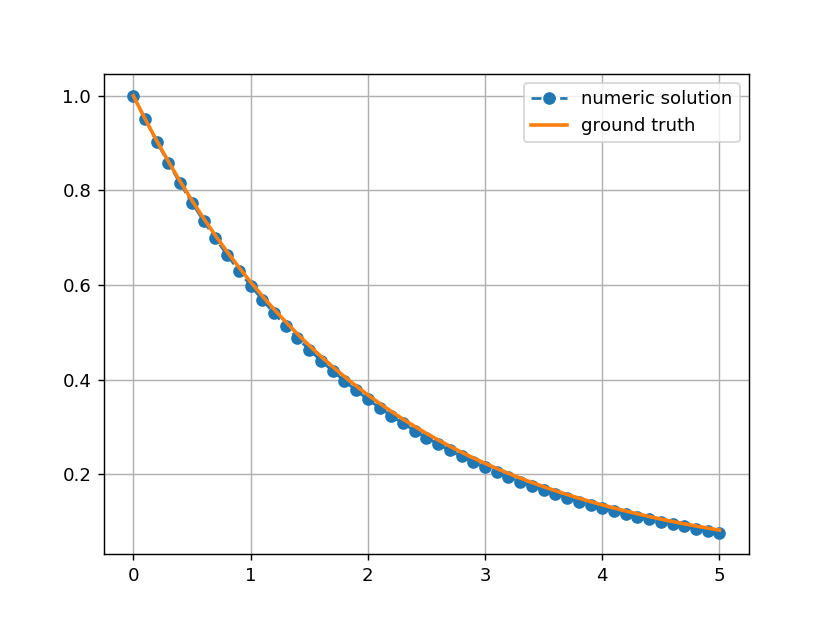

In [62]:
plt.figure()
lam = -0.5
tt, y = euler_solve(lam, u0=1.0, T=5, dt=0.1)
plt.plot(tt, y, 'o--', label='numeric solution')
plt.plot(tt, np.exp(lam*tt), '-', lw=2, label='ground truth')
plt.legend(loc='best')
plt.grid(True)

### Test I.1

Test the function above for varying step size $\tau$ (in the code it's `dt`), including $|\lambda| \tau > 1$? 

(10% of the grade)

<IPython.core.display.Javascript object>


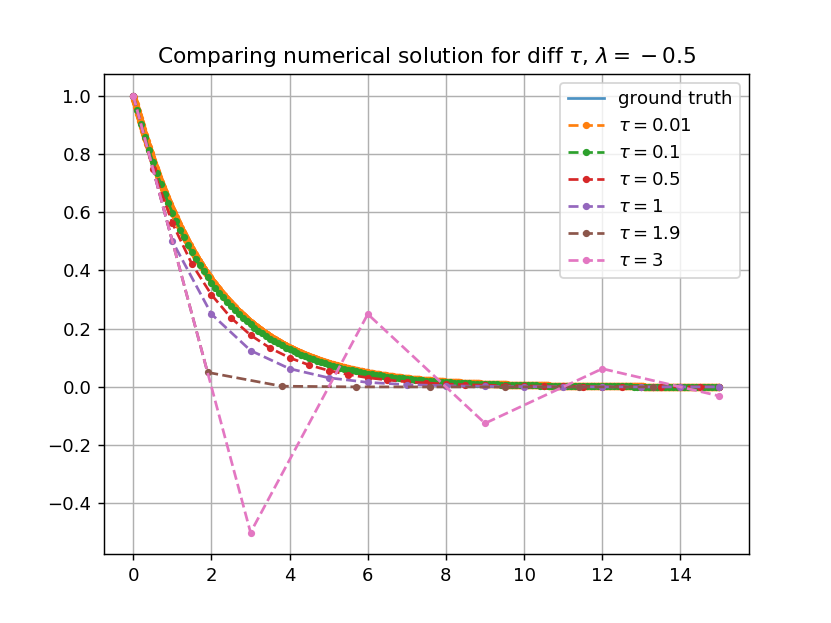

In [63]:
%matplotlib notebook
lam = -0.5
tau = [0.01, 0.1, 0.5, 1, 1.9, 3]
plt.figure()
plt.title(r'Comparing numerical solution for diff $\tau$, $\lambda = -0.5$')
tt = np.linspace(0,15,400)
plt.plot(tt, np.exp(lam*tt), '-', lw=1.5, label='ground truth', alpha=0.8)
for i in tau:
    tt, y = euler_solve(lam, u0=1.0, T=15, dt=i)
    plt.plot(tt, y, '.--', label=fr'$\tau = {i}$')

plt.legend(loc='best')
plt.grid(True)

### Test I.2

Implement a function for solving the same equation, $du/dt = \lambda u$ using the implicit Euler scheme. Compare the behavior of the implicit and explicit Euler schemes. Discuss.

(10% of the grade)

In [64]:
def euler_solve_im(lam, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an implicity Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.empty(num_steps+1)
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] / (1 - dt*lam)
    return tt, y

<IPython.core.display.Javascript object>


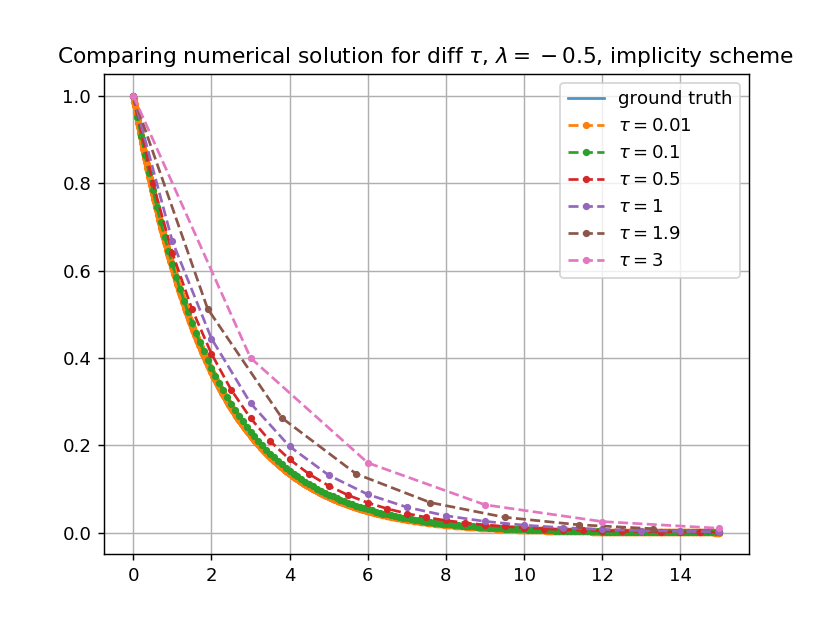

In [65]:
%matplotlib notebook
lam = -0.5
tau = [0.01, 0.1, 0.5, 1, 1.9, 3]
plt.figure()
plt.title(r'Comparing numerical solution for diff $\tau$, $\lambda = -0.5$, implicity scheme ')
tt = np.linspace(0,15,400)
plt.plot(tt, np.exp(lam*tt), '-', lw=1.5, label='ground truth', alpha=0.8)
for i in tau:
    tt, y = euler_solve_im(lam, u0=1.0, T=15, dt=i)
    plt.plot(tt, y, '.--', label=fr'$\tau = {i}$')

plt.legend(loc='best')
plt.grid(True)

But what am I supposed to discuss? It is easy to see, that for any $\tau$ implicity scheme there is stability.

## II. Stiff systems.

Consider a system of two first order equations

$$
\frac{d \mathbf{u} }{d t} = A \mathbf{u}
$$

where $\mathbf{u}$ is a two-dimensional vector, and $A$ is a known constant 2$\times$2 matrix.

Implement a generalization of `euler_solve` routine for solving a system of linear first-order equations with time-independent matrix $A$ using the explicit Euler's method.

In [66]:
def euler_solve(a, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros([num_steps+1, u0.shape[0]])
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt * a @ y[k]
    return tt, y

### Test II.1

Take 
$$
A = \begin{bmatrix} -10 & 10 \\ 32 & -499 \end{bmatrix}
$$

and the initial condition $\mathbf{u} = (1, 0)^T$.

Solve the system using a fixed step size $\tau=0.01$. Is the explicit Euler's method stable at this value of the step size?

Find eigenvalues of $A$ (use `np.linalg.eigvals`) and comment whether the system is stif.

(20% of the grade)

In [67]:
a = np.array([[-10,10],[32, -499]])
y0 = np.array([1,0])
tt, y = euler_solve(a, y0, T=5, dt=0.01)
noise = np.array([1e-5,3e-5])
__,y_noise = euler_solve(a, y0+noise, T=5, dt=0.01)

<IPython.core.display.Javascript object>


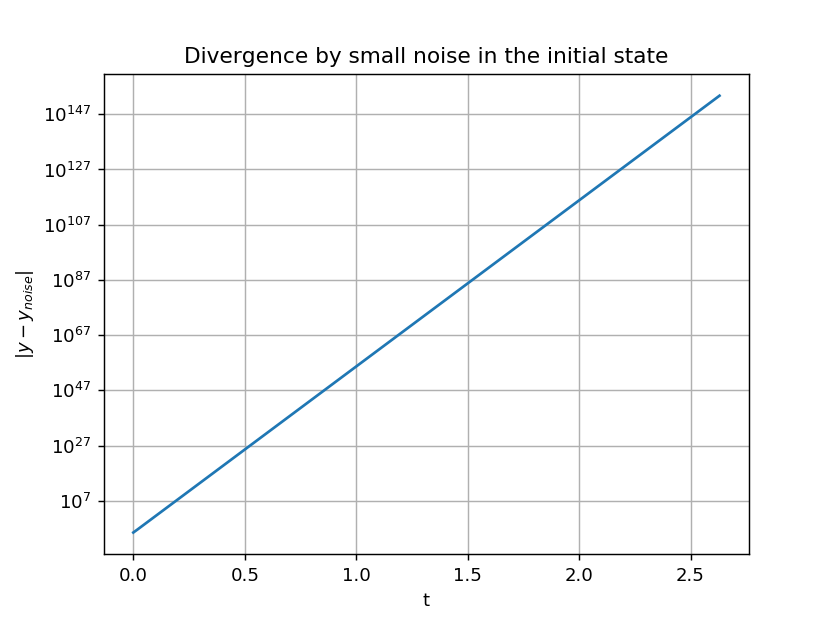

/home/maxkway/anaconda3/lib/python3.7/site-packages/numpy/linalg/linalg.py:2506: RuntimeWarning: overflow encountered in multiply
  s = (x.conj() * x).real


In [68]:
plt.figure()
plt.grid()
plt.title(r'Divergence by small noise in the initial state')
plt.plot(tt, np.linalg.norm(y-y_noise, axis=1))
plt.ylabel(r'$\| y - y_{noise}\|$')
plt.xlabel('t')
plt.yscale('log')

In [10]:
eig = np.linalg.eigvals(a)
eig

array([  -9.34647667, -499.65352333])

As we can see it is very stiff system, whith informal parametr $s \sim 50 \gg 1$

### Test II.2

Implement the $\textit{implicit}$ Euler's scheme for a system of first-order equations with constant coefficients. Note that at each time step you need to solve a system of linear algebraic equations, use `np.linalg.solve` for that.

Use this routine to solve the system from Test II.1 at the same step size $\tau=0.01$. Compare solutions obtained by an explicit and an implicit Euler's methods.

(20% of the grade)

In [69]:
def euler_solve_im(a, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros([num_steps+1, u0.shape[0]])
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = np.linalg.solve(1-dt*a,y[k])
    return tt, y

<IPython.core.display.Javascript object>


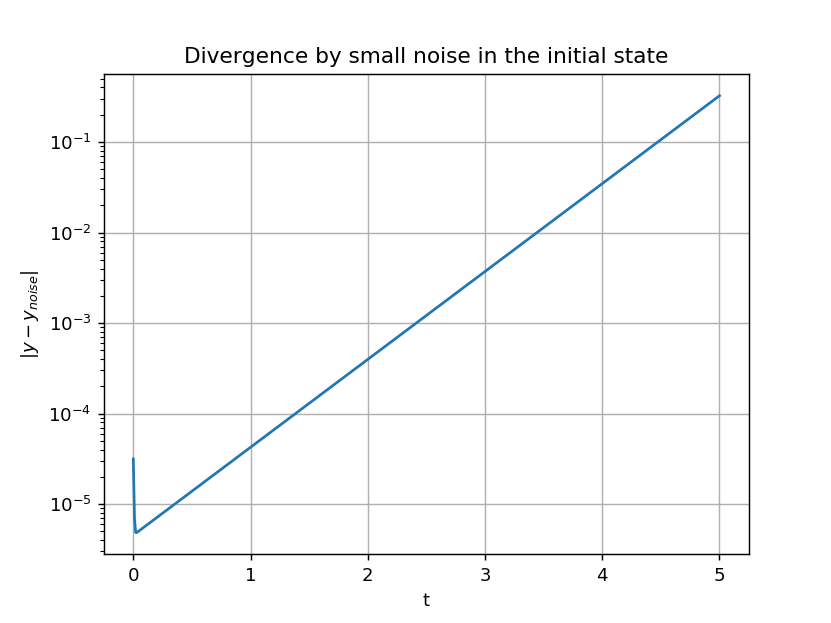

In [70]:
a = np.array([[-10,10],[32, -499]])
y0 = np.array([1,0])
tt, y = euler_solve_im(a, y0, T=5, dt=0.01)
noise = np.array([1e-5,3e-5])
__,y_noise = euler_solve_im(a, y0+noise, T=5, dt=0.01)
plt.figure()
plt.grid()
plt.title(r'Divergence by small noise in the initial state')
plt.plot(tt, np.linalg.norm(y-y_noise, axis=1))
plt.ylabel(r'$\| y - y_{noise}\|$')
plt.xlabel('t')
plt.yscale('log')

In [71]:
T = 1.5
dt=0.01
eps = np.logspace(-9,0,10)
tt, y = euler_solve_im(a, y0, T, dt)



norm_noise = []
err_ex = []
err_im = []
for e in eps:
    noise = np.array([1,3]) * e
    norm_noise.append(np.linalg.norm(noise))
    __, y_ex = euler_solve(a, y0 + noise, T, dt)
    __, y_im = euler_solve_im(a, y0 + noise, T, dt)
    err_ex.append(np.linalg.norm((y-y_ex)[-1]))
    err_im.append(np.linalg.norm((y-y_im)[-1]))
norm_noise = np.array(norm_noise)
err_ex = np.array(err_ex)
err_im = np.array(err_im)


<IPython.core.display.Javascript object>


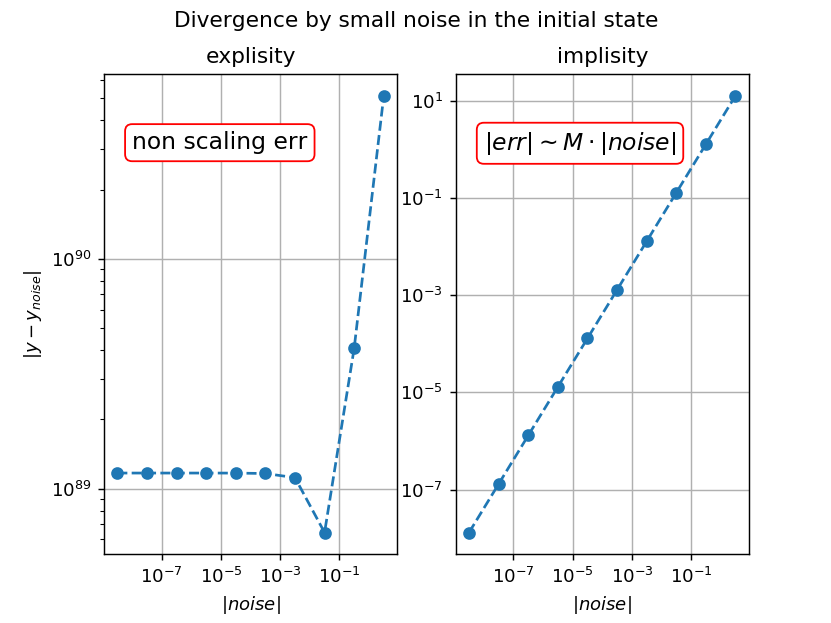

Text(1e-08, 1.0, '$\\|err\\| \\sim M \\cdot \\|noise\\|$')

In [72]:
f, (ax1, ax2) = plt.subplots(1, 2)
f.suptitle(r'Divergence by small noise in the initial state')
box_1 = {'facecolor':'white',    #  цвет области
       'edgecolor': 'red',     #  цвет крайней линии
       'boxstyle': 'round'}    #  стиль области
ax=ax1
ax.set_ylabel(r'$\| y - y_{noise}\|$')
ax.set_xlabel(r'$\|noise\|$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(norm_noise,err_ex,'o--',label='explisity')
ax.set_title('explisity')
ax.grid()
ax.text( 1e-8, 3e90 , r'non scaling err',          fontsize=13, bbox = box_1)

ax=ax2
#ax.set_ylabel(r'$\| y - y_{noise}\|$')
ax.set_xlabel(r'$\|noise\|$')
ax.set_yscale('log')
ax.set_xscale('log')
ax.plot(norm_noise,err_im,'o--',label='implisity')
ax.set_title('implisity')
ax.grid()

ax.text( 1e-8, 1e0,  r'$\|err\| \sim M \cdot \|noise\|$',          fontsize=13, bbox = box_1)

## It is evident, that explicity sheme is unstable!

# III. Second order ODEs.

Consider a second order ODE, which describes a oscillating pendulum

$$
\frac{d^2 u}{dt^2} + \omega^2 u = 0
$$

Convert this second order ODE into a system of two first order ODEs.

### Test III.1 

Solve this system of equations using the explicit Euler's method over a time interval which includes at least several periods. We know that the equation of motion conserves energy, so that

$$
E = \frac{u'^2}{2} + \frac{\omega^2 u^2}{2}
$$

should remain constant. Plot the dependence of $E$ on time for your numeric solution. Use several values of the time step. Does your discretized scheme conserve energy?

(20% of the grade)

<IPython.core.display.Javascript object>


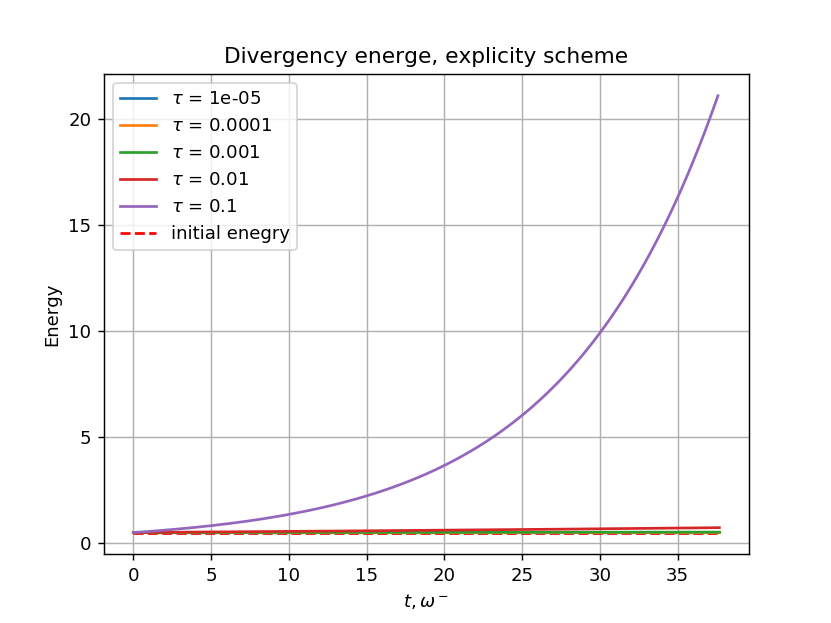

In [23]:
a = np.array([[0,1],[-1, 0]])
y0 = np.array([1,0])
tau = np.logspace(-5,-1, 5)
T = 2*np.pi * 6
plt.figure()
plt.grid()
plt.title('Divergency energe, explicity scheme')
for dt in tau:
    tt, y = euler_solve(a, y0, T, dt)
    e = (y**2).sum(axis=1)/2
    plt.plot(tt, e, label=fr'$\tau$ = {dt}')
plt.ylabel('Energy')
plt.hlines(y0 @ y0/2,0,T,'red','--',label='initial enegry')
plt.xlabel(r'$t,\omega^-$')
plt.legend()

<IPython.core.display.Javascript object>


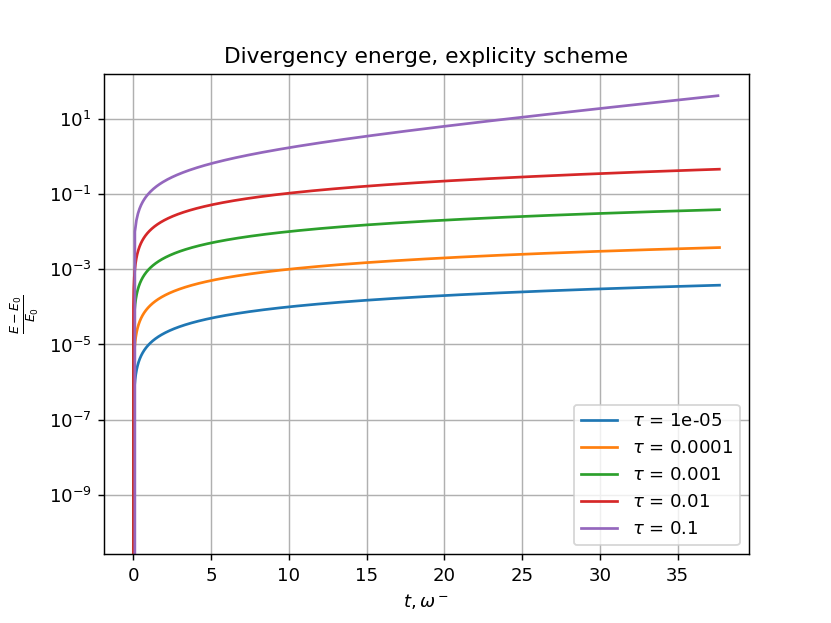

In [22]:
a = np.array([[0,1],[-1, 0]])
y0 = np.array([1,0])
tau = np.logspace(-5,-1, 5)
T = 2*np.pi * 6
E0 = y0 @ y0/2
plt.figure()
plt.grid()
plt.title('Divergency energe, explicity scheme')
for dt in tau:
    tt, y = euler_solve(a, y0, T, dt)
    e = (y**2).sum(axis=1)/2
    plt.plot(tt, (e-E0)/E0, label=fr'$\tau$ = {dt}')
plt.ylabel(r'$\frac{E-E_0}{E_0}$')
plt.xlabel(r'$t,\omega^-$')
plt.legend()
plt.yscale('log')

### Test III.2

Implement the 2nd order Runge-Kutta scheme. Use it to solve the same equation with same time steps. Compare solutions produced by the RK method and the Euler's method at the same values of the time step. Check conservation of energy. Discuss.

(20% of the grade)

In [20]:
def rg2(a, u0, T, dt):
    """Solve $du/dt = \lambda u$ on $0 < t < T$ with $u(t=0) = u0$ via an explicit Euler method."""
    num_steps = int(T/dt)
    tt = np.arange(num_steps+1)*dt
    y = np.zeros([num_steps+1, u0.shape[0]])
    y[0] = u0
    for k in range(num_steps):
        y[k+1] = y[k] + dt * a @ (dt/2*a @ y[k] + y[k])
    return tt, y

<IPython.core.display.Javascript object>


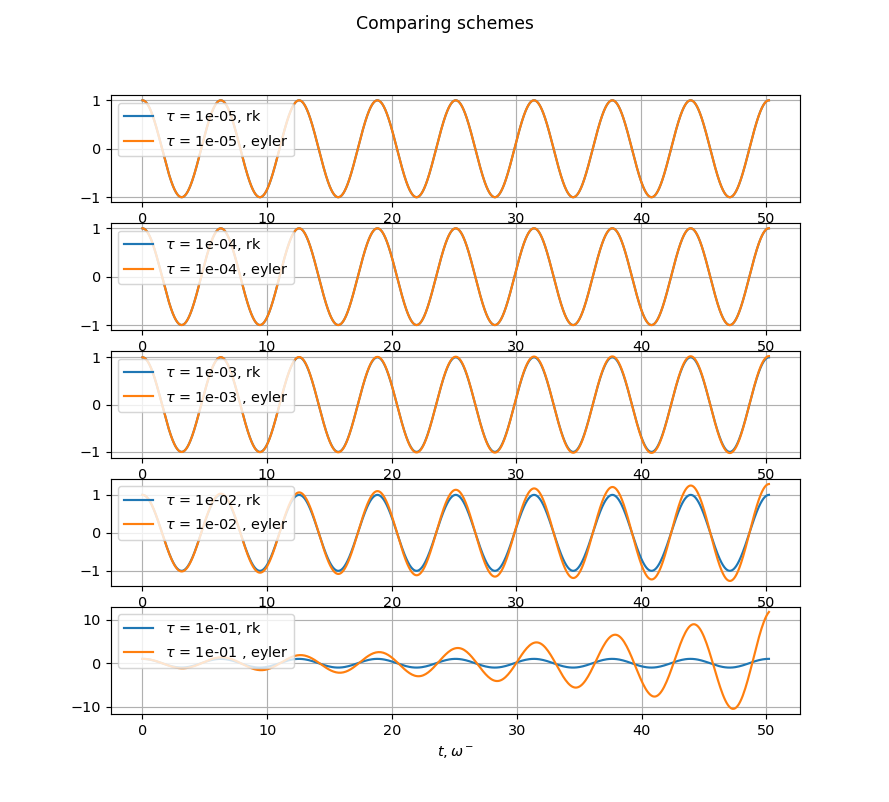

Text(0.5, 0, '$t,\\omega^-$')

In [55]:
#Ok. Comparing solution..
a = np.array([[0,1],[-1, 0]])
y0 = np.array([1,0])
tau = np.logspace(-5,-1, 5)
T = 2*np.pi*8
i=1
plt.subplots(5,1, sharex=True, sharey=True)
plt.suptitle('Comparing schemes')
for dt in tau:
    plt.subplot(5,1,i)
    tt, y = rg2(a, y0, T, dt)
    plt.plot(tt, y[:,0], label=r'$\tau$ = %0.e, rk' % dt)
    
    tt, y = euler_solve(a, y0, T, dt)    
    plt.plot(tt, y[:,0], label=r'$\tau$ = %0.e , eyler' % dt)
    
    i+=1
    plt.legend(loc='upper left')
    #plt.title(fr'$\tau$ = {dt}')
    plt.grid()

plt.xlabel(r'$t,\omega^-$')


<IPython.core.display.Javascript object>


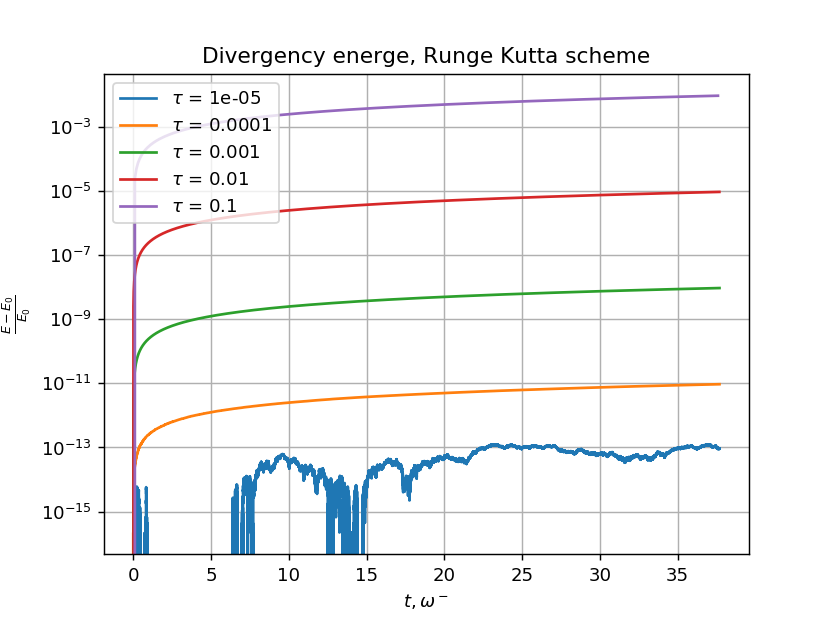

In [21]:
a = np.array([[0,1],[-1, 0]])
y0 = np.array([1,0])
tau = np.logspace(-5,-1, 5)
T = 2*np.pi * 6
E0 = y0 @ y0/2
plt.figure()
plt.grid()
plt.title('Divergency energe, Runge Kutta scheme')
for dt in tau:
    tt, y = rg2(a, y0, T, dt)
    e = (y**2).sum(axis=1)/2
    plt.plot(tt, (e-E0)/E0, label=fr'$\tau$ = {dt}')
plt.ylabel(r'$\frac{E-E_0}{E_0}$')
plt.xlabel(r'$t,\omega^-$')
plt.legend()
plt.yscale('log')

We can notice that error are scaling by step $\tau$ with order nearby order of approximating, but bot for RK.
To understand it let's consider integral of movement:
$$
E = E(\mathbf{x}(t)) = E_0 
$$
**In eyler scheme**:
$$
   \frac{ E_{n+1} - E_{n}}{\tau} = \underbrace{\mathbf{f} \,\nabla E}_{=0} + \fbox{$\frac{\tau}{2}$} \,(\hat{H}\mathbf{f},\mathbf{f})+O(\tau^2) \text{ where } H_{jk} = \frac{\partial^2 E }{\partial x_j \partial x_k} 
$$
And it corresponds gotten plot where $err \sim \tau$

**In RK scheme**:
$$
   \frac{ E_{n+1} - E_{n}}{\tau} = \mathbf{f}\left(\mathbf{x_n}+\mathbf{f_n}\frac{\tau}{2}\right) \,\nabla E_n + \frac{\tau}{2} \,(\hat{H}\mathbf{f}(\dots),\mathbf{f}(\dots))+O(\tau^2)  = \frac{\tau}{2} \cdot(\hat{J}\mathbf{f_n},\nabla E_n) + \frac{\tau}{2} \,(\hat{H}\mathbf{f}_n,\mathbf{f}_n)+O(\tau^2) \text{ where } J_{jk} = \frac {\partial f_j} {\partial x_k}
$$
In our case
$$
E = \frac{1}{2}\mathbf{x}^2 \implies \nabla E = \mathbf{x} \implies \hat{H} = \hat{I}
$$
$$
\mathbf{f} = \hat{A}\mathbf{x} \implies \hat{J} = \hat{A}
$$
If we substitude it in formula:
$$
 \frac{ E_{n+1} - E_{n}}{\tau} = \frac{\tau}{2}((\hat{A}^2 \mathbf{x}_n,\mathbf{x}_n) + (\hat{A}\mathbf{x}_n,\hat{A}\mathbf{x}_n)) + O(\tau^2) = \frac{\tau}{2}(\underbrace{(\hat{A}^2 + \hat{A}^{\dagger}\hat{A})}_{=0,\text{ because }\hat{A}^{\dagger}= - \hat{A}}  \,\mathbf{x}_n, \mathbf{x}_n) + O(\tau^2) = \fbox{$O(\tau^2)$}
$$

Thus, RK scheme has at least second order of conservate energy, but if we follow on third order in our case, we find out, that $D_{ijk} = \frac{\partial^2 f_i}{\partial x_j \partial x_k}=0$ and only $(\mathbf{f}, \hat{J}\mathbf{f})$ remains.
$$
(\mathbf{f}, \hat{J}\mathbf{f}) = ( \mathbf{x} ,\hat{A}^{\dagger}\hat{A}^2 \mathbf{x})\sim (\mathbf{x},\hat{A}^{\dagger} \mathbf{x})\sim (\mathbf{x}, \mathbf{\dot{x}})  = 0 \text{ due to conservation energy for true solution!}
$$
### **Thus we have $\fbox{3 order !}$**
This we and see on plot..